Dataset Overview:

      Trial ID                                              Title  \
0  NCT06215027  The Effects of Dance for Breast Cancer Patient...   
1  NCT01704027  Safety Study of Pelvic and Prostatic SIB-IMRT ...   
2  NCT02471027  The Clinical Research of Neoadjuvant Chemother...   
3  NCT05780073  Safety and Impact of Dasatinib on Viral Persis...   
4  NCT02839473  Hydrosorb® Versus Control in the Management of...   

                             Condition  \
0                        Breast Cancer   
1                      Prostate Cancer   
2                      Cervical Cancer   
3                HIV Infection Primary   
4  Breast Cancer, Radiation Dermatitis   

                                        Intervention      Study Type   Phase  \
0                                              Dance  INTERVENTIONAL     NaN   
1  Simultaneous integrated boost intensity-modula...  INTERVENTIONAL  PHASE2   
2                           Neoadjuvant chemotherapy   OBSERVATIONAL     

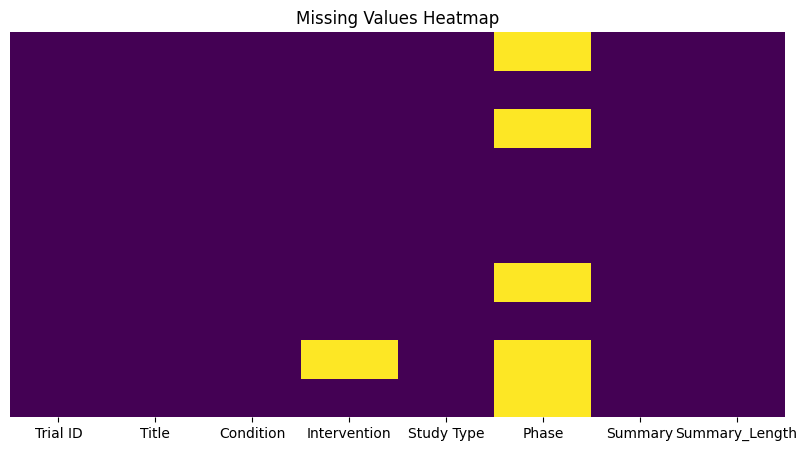

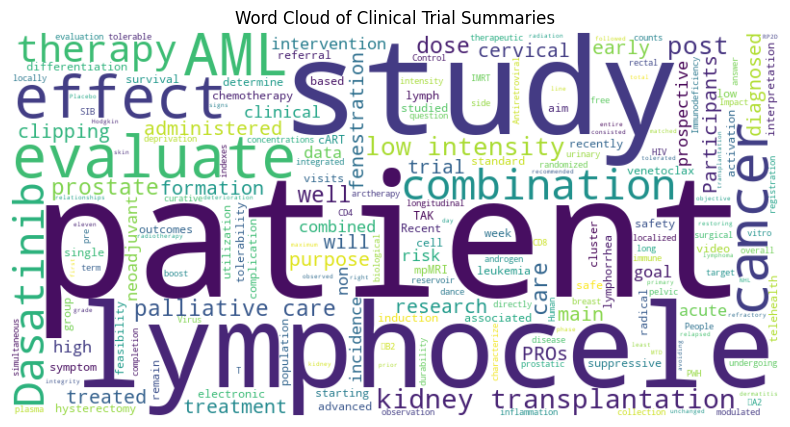

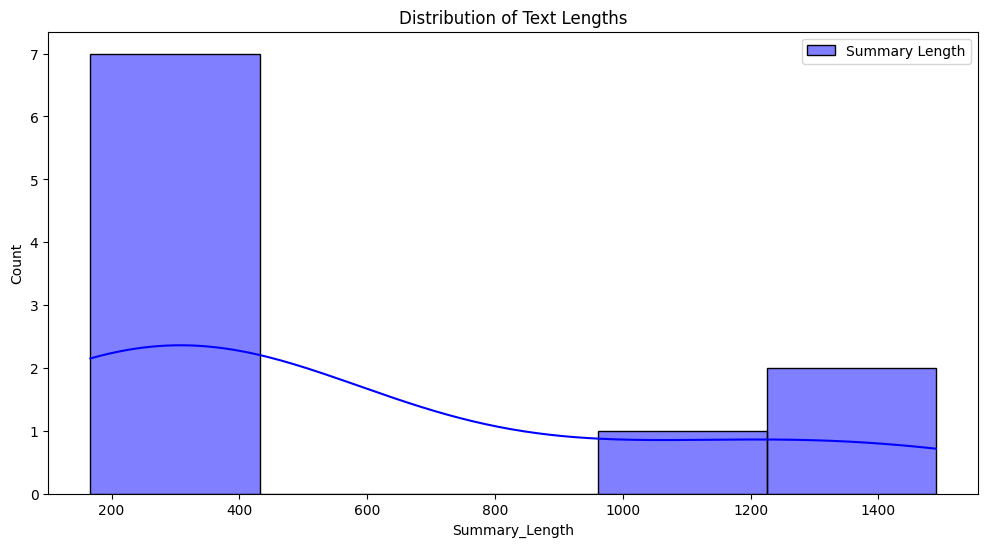

C:\Users\ECO11\AppData\Local\Temp\ipykernel_4120\1740797676.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Summary_Length', palette='viridis')


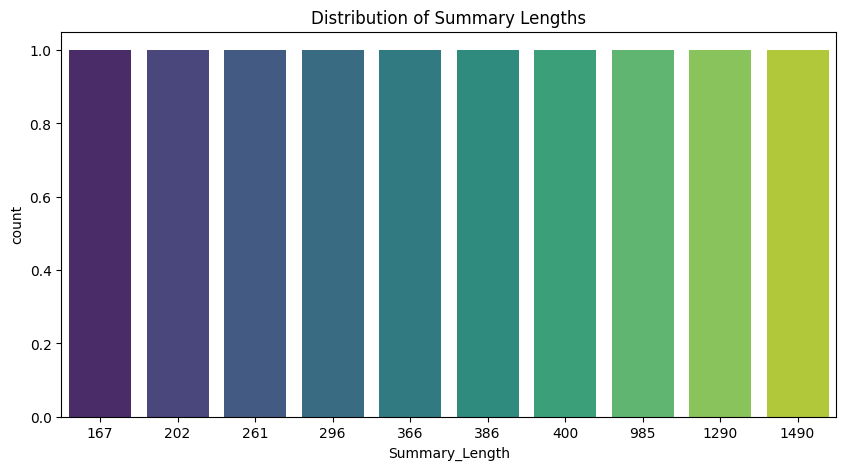

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the clinical trial corpus dataset
file_path = "C:/Users/ECO11/Desktop/MINE/Conversational Retrieval Augmented Fine Tuning Outpatients Cancer Management/data/corpus/clinical_trials_corpus.csv"
df = pd.read_csv(file_path)

# 1. Dataset Overview
print("Dataset Overview:\n")
print(df.head())  # Show first few rows

# Display column names and data types
print("\nColumn Information:")
print(df.info())

# 2. Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# 3. Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Records: {duplicate_count}")

# 4. Analyze text length (for both 'Summary' and 'Full_Text')
df["Summary_Length"] = df["Summary"].astype(str).apply(len)

# Check if 'Full_Text' column exists before processing
if 'Full_Text' in df.columns:
    df["Full_Text_Length"] = df["Full_Text"].astype(str).apply(len)
else:
    print("Full_Text column is missing. Skipping analysis for this column.")

print("\nText Length Statistics:")
# Only print statistics for available columns
if 'Full_Text_Length' in df.columns:
    print(df[["Summary_Length", "Full_Text_Length"]].describe())
else:
    print(df[["Summary_Length"]].describe())

# 5. Visualize missing data with a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# 6. Generate a word cloud from the 'Summary' column
all_text = " ".join(df["Summary"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Clinical Trial Summaries")
plt.show()

# 7. Visualize the distribution of text length for 'Summary' and 'Full_Text'
plt.figure(figsize=(12, 6))
sns.histplot(df["Summary_Length"], kde=True, color="blue", label="Summary Length")
if 'Full_Text_Length' in df.columns:
    sns.histplot(df["Full_Text_Length"], kde=True, color="green", label="Full Text Length")
plt.title("Distribution of Text Lengths")
plt.legend()
plt.show()

# 8. Distribution of missing values in the 'Summary' and 'Full_Text' columns
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Summary_Length', palette='viridis')
plt.title("Distribution of Summary Lengths")
plt.show()

# If you want to perform additional analysis, you can also explore other columns in the dataset.
